In [5]:
import numpy as np 
import pandas as pd

In [6]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
# install seaborn
! python -m pip install seaborn

# import library
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [9]:
# install openpyxl (will let us read xlsx files)
! python -m pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 242 kB 2.0 MB/s eta 0:00:01


In [18]:
# download the dataset and read it into a pandas dataframe:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

In [19]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum(axis = 1, numeric_only=True)

# limit the years
years = list(map(str, range(1980, 2014)))

# get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


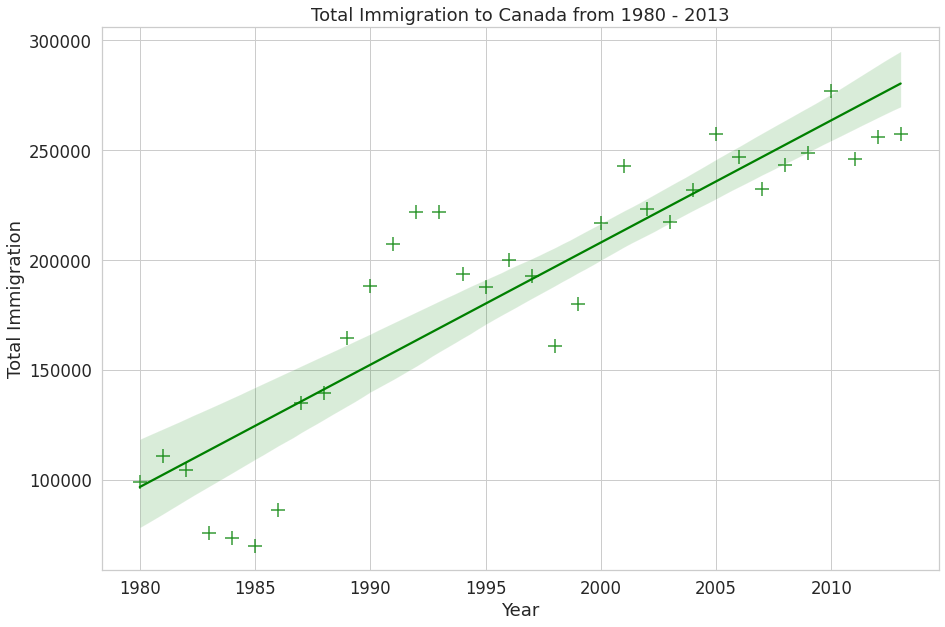

In [23]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.show()